In [1]:
import numpy as np
import pandas as pd
import pulse2percept as p2p
import p2pspatial

%matplotlib inline
import matplotlib.pyplot as plt

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)
2018-04-23 17:19:18,719 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
implant = p2p.implants.ArgusII(rot=-0.3)

In [3]:
X = pd.DataFrame([e.name for e in implant], columns=['electrode'])

In [4]:
models = [
    p2pspatial.models.ModelA,
    p2pspatial.models.ModelB,
    p2pspatial.models.ModelC,
    p2pspatial.models.ModelD,
]
params = [
    {'xystep': 0.1, 'implant_rot': -0.3, 'rho': 200},
    {'xystep': 0.1, 'implant_rot': -0.3, 'rho': 200},
    {'xystep': 0.2, 'implant_rot': -0.3, 'rho': 200, 'axlambda': 100},
    {'xystep': 0.2, 'implant_rot': -0.3, 'rho': 200, 'axlambda': 100},
]
data = [
    X,
    X,
    X,
    X,
#     pd.DataFrame(['A1', 'A10', 'F1', 'F10'], columns=['electrode']),
#     pd.DataFrame(['A1', 'A10', 'F1', 'F10'], columns=['electrode']),
]

<class 'p2pspatial.models.ModelA'>
<class 'p2pspatial.models.ModelB'>
<class 'p2pspatial.models.ModelC'>
<class 'p2pspatial.models.ModelD'>


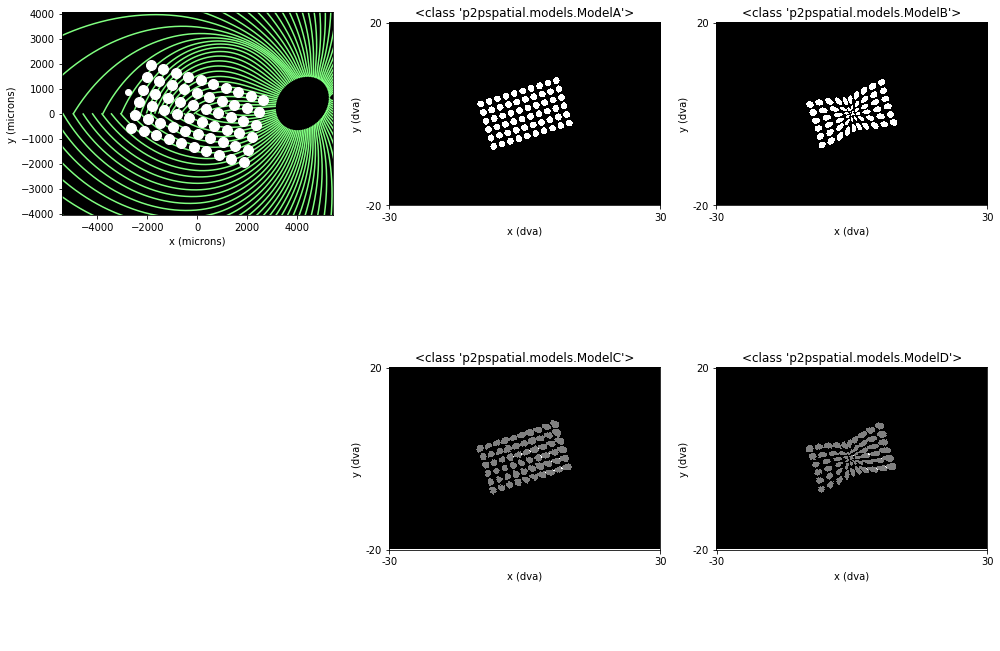

In [5]:
ncols = 3
nrows = int(np.ceil((len(models) + 1) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 5 * nrows))
if len(axes.ravel()) > 3:
    axes.ravel()[3].axis('off')
    axes = np.delete(axes.ravel(), 3)
for model, kwargs, xdata, ax in zip([None] + models, [None] + params, [None] + data, axes.ravel()):
    if not model:
        sim = p2p.Simulation(implant)
        sim.plot_fundus(ax=ax, annotate=False)
        ax.set_title('')
        continue
    print(model)
    m = model(**kwargs)
    m.fit(xdata)
    img = np.sum([y['image'] for _, y in m.predict(xdata).iterrows()], axis=0)
    ax.imshow(img, cmap='gray')
    ax.set_xticks([0, img.shape[1]])
    ax.set_xticklabels(m.xrange)
    ax.set_xlabel('x (dva)')
    ax.set_yticks([0, img.shape[0]])
    ax.set_yticklabels(list(m.yrange)[::-1])
    ax.set_ylabel('y (dva)')
    ax.set_title(model)
fig.tight_layout()

In [6]:
A = [27.4839513154, 46.3120216288, 36.7315418707]
B = [25.1036213698, 41.385881315, 33.7542948012]
C = [23.9322900736, 29.778929845, 31.2626244634]
D = [24.9495385875, 33.4290698348, 31.4609594461]

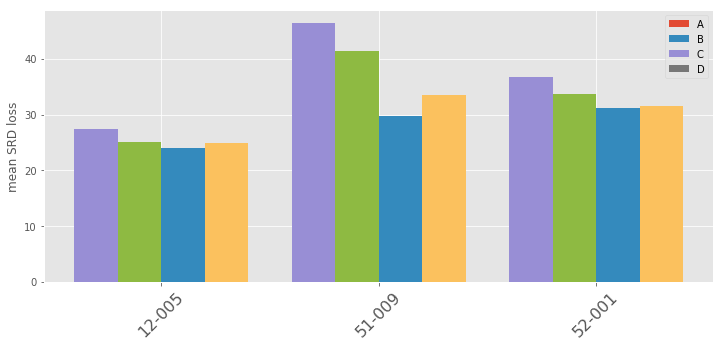

In [7]:
plt.style.use('ggplot')
subjects = ['12-005', '51-009', '52-001']

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(12, 5))

N = 3
width = 0.6 / N
ind = np.arange(N)

rects = []
for m, mu in enumerate([A, B, C, D]):
    for subject in subjects:
        rects.append(ax.bar(ind + m * width, mu, width, yerr=0))
ax.set_xticks(ind + (4 - 1) / 2 * width)
ax.set_xticklabels(subjects, rotation=45, ha='center', fontsize=16)
ax.set_ylabel('mean SRD loss')
ax.legend([r[0] for r in rects], ['A', 'B', 'C', 'D'])